http://varianceexplained.org/statistics/beta_distribution_and_baseball/

### The Beta distribution represents a PROBABILITY OF PROBABILITIES

#### i.e. it represents the possible values of a probability when we don't know what the probability actually is

# Example: Batting Averages

- A batting average in baseball represents the frequency of getting a base hit per at bat

# $\text{Batting Average} = \frac{\text{Number of base hits}}{\text{Number of at bats}}$

- Typically, 0.266 is considered a good batting average
    - 0.300 is considered excellent

**Early in the season, we want to predict the season-long batting average for a player**
- **But we can't use their average so far since it will be inaccurate**
    - If a player goes up to bat once and gets a single, his batting average is briefly 1.000
    - If he strikes out or walks, his batting average is 0.000.

 - We know that historically, **most batting averages over a season have hovered between something like .215 and .360**
     - Some extremely rare exceptions on either side
     
- We know that if a player gets a few strikeouts in a row at the start, that **might** indicate he’ll end up a **bit worse** than average
    - But we know he probably won’t deviate from that range.

- Since every at bat is essentiall a success or a failure, we can represent the at bats with a **Binomial Distribution**

- The best way to represent our prior expectations (what we in statistics just call a prior) is with the **Beta Distribution**

**What the Beta Distribution incorporates**: before a player takes his first swing of the season, what do we expect his batting average to be?

- The domain of the batting average is (0,1) [i.e. a probability]

** Assume a player named Hank has a batting average of 0.270**
- This means that out of 300 at bats, he'll get on base 81 times (and not on base 219 times)
    
The Beta distribution has shape parameters $\alpha$ and $\beta$
- For Hank, let $\alpha$ = 81  and $\beta$ = 219 

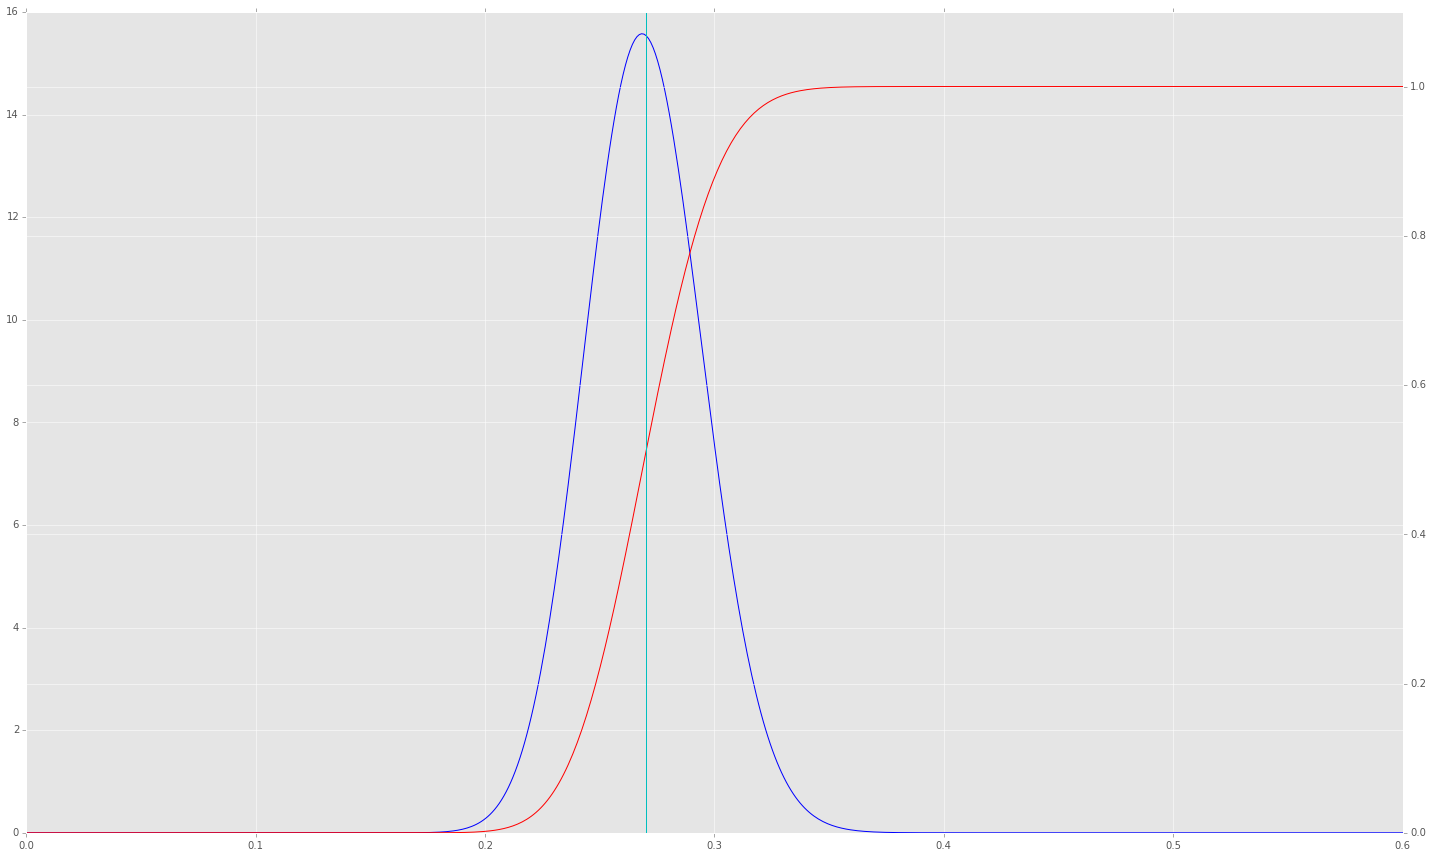

In [20]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams["figure.figsize"] = [20,12]

x = np.linspace(0,1,1000)
a = 81
b = 219
hank_pdf = beta.pdf(x, a, b, scale=1)
hank_cdf = beta.cdf(x, a, b, scale=1)

fig, ax1 = plt.subplots()
ax1.plot(x, hank_pdf, 'b-')

ax2 = ax1.twinx()
ax2.plot(x, hank_cdf, 'r')

fig.tight_layout()
plt.axvline(x=0.27, color = 'c')
plt.xlim(0,0.6)
plt.ylim(0,1.1)
plt.show()

### Question: why not make $\alpha$ = 270 and $\beta$ = 730 (or some other multiple of 0.270)?

Note how in the chart above the min value on the x-axis is just below 0.2 and the max is just above 0.35
- This seems like an appropriate range for batting averages

Let's see how the Beta distribution will look if we set $\alpha$ to 270

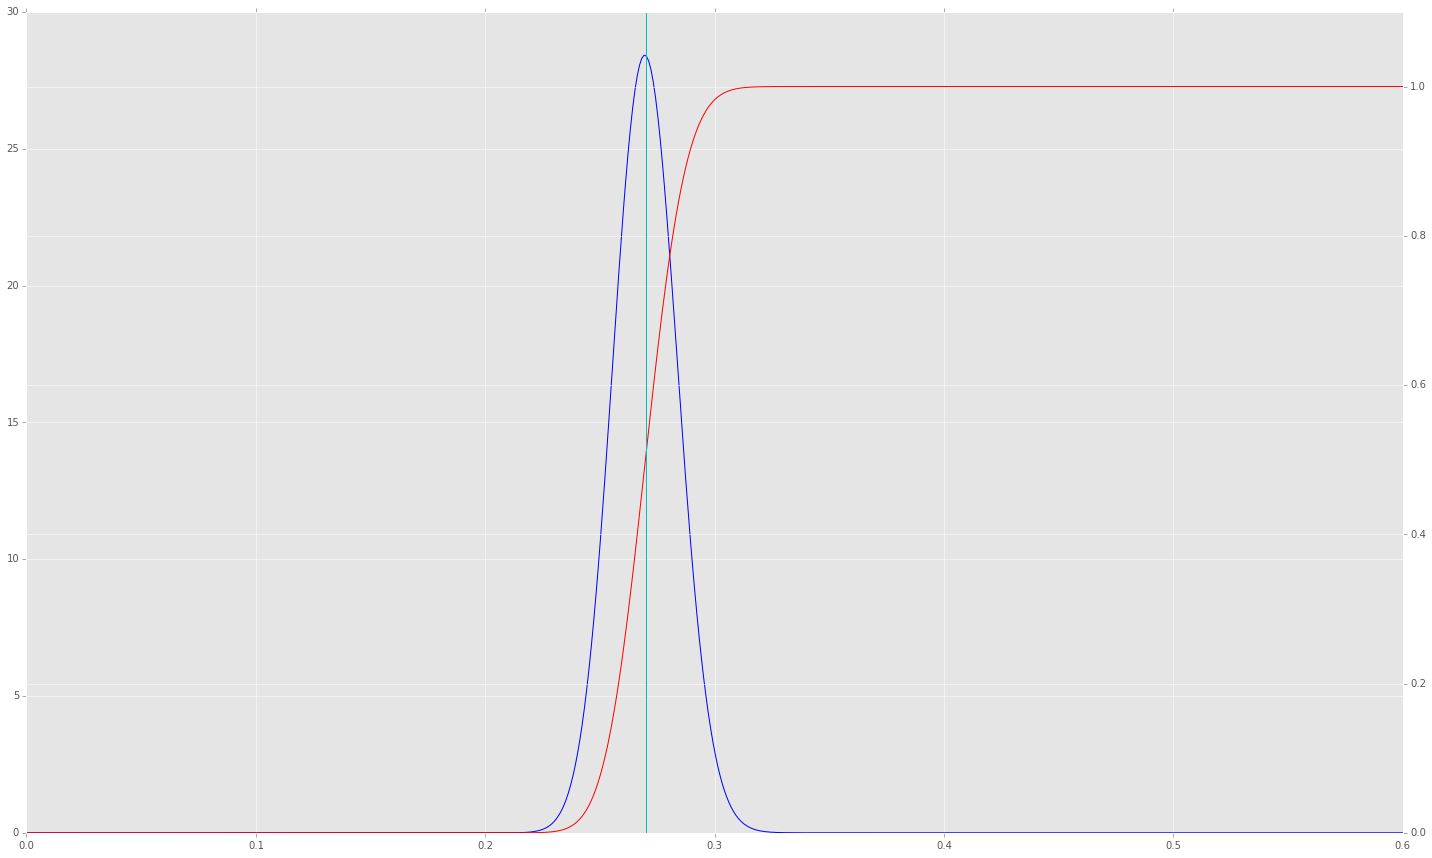

In [21]:
x = np.linspace(0,1,1000)
a = 270
b = 730
hank_pdf = beta.pdf(x, a, b, scale=1)
hank_cdf = beta.cdf(x, a, b, scale=1)

fig, ax1 = plt.subplots()
ax1.plot(x, hank_pdf, 'b-')

ax2 = ax1.twinx()
ax2.plot(x, hank_cdf, 'r')

fig.tight_layout()
plt.axvline(x=0.27, color = 'c')
plt.xlim(0,0.6)
plt.ylim(0,1.1)
plt.show()

### Notice how the x values are more squeezed

### Let's do it again, but with $\alpha$ = 27 and $\beta$ = 73

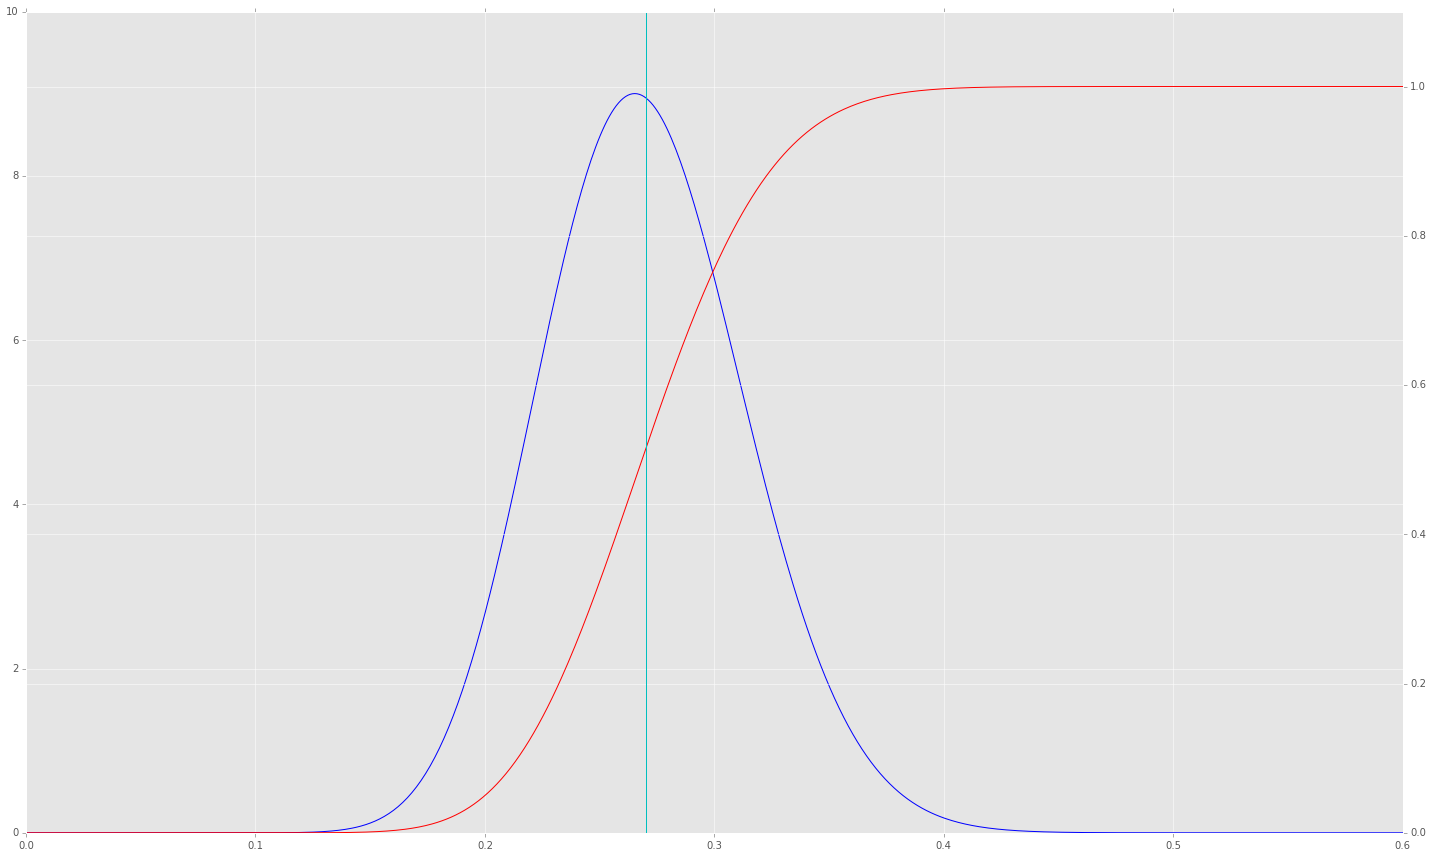

In [24]:
x = np.linspace(0,1,1000)
a = 27
b = 73
hank_pdf = beta.pdf(x, a, b, scale=1)
hank_cdf = beta.cdf(x, a, b, scale=1)

fig, ax1 = plt.subplots()
ax1.plot(x, hank_pdf, 'b-')

ax2 = ax1.twinx()
ax2.plot(x, hank_cdf, 'r')

fig.tight_layout()
plt.axvline(x=0.27, color = 'c')
plt.xlim(0,0.6)
plt.ylim(0,1.1)
plt.show()

### This one is way wider

# NB: The y-axis represents the probability of achieving the batting average, and the x-axis represents the batting average

# $\therefore$ both the x-axis and y-axis represent a probability

___

## Now, at his first at bat of the season, Hank gets on base

- Hank's record for the season is 1 for 1
    - We need to adjust our distribution to include this information
    
**Recall**: we made our distribution assuming Hank would be on base 81 times for 300 at bats
- Now he's on base 82 times for 301 at bats
    - **Set $\alpha$ = 82 and keep $\beta$ = 219**
    
**Note**: we'll skip the math proving this, but it's shown [here](https://en.wikipedia.org/wiki/Conjugate_prior#Example)

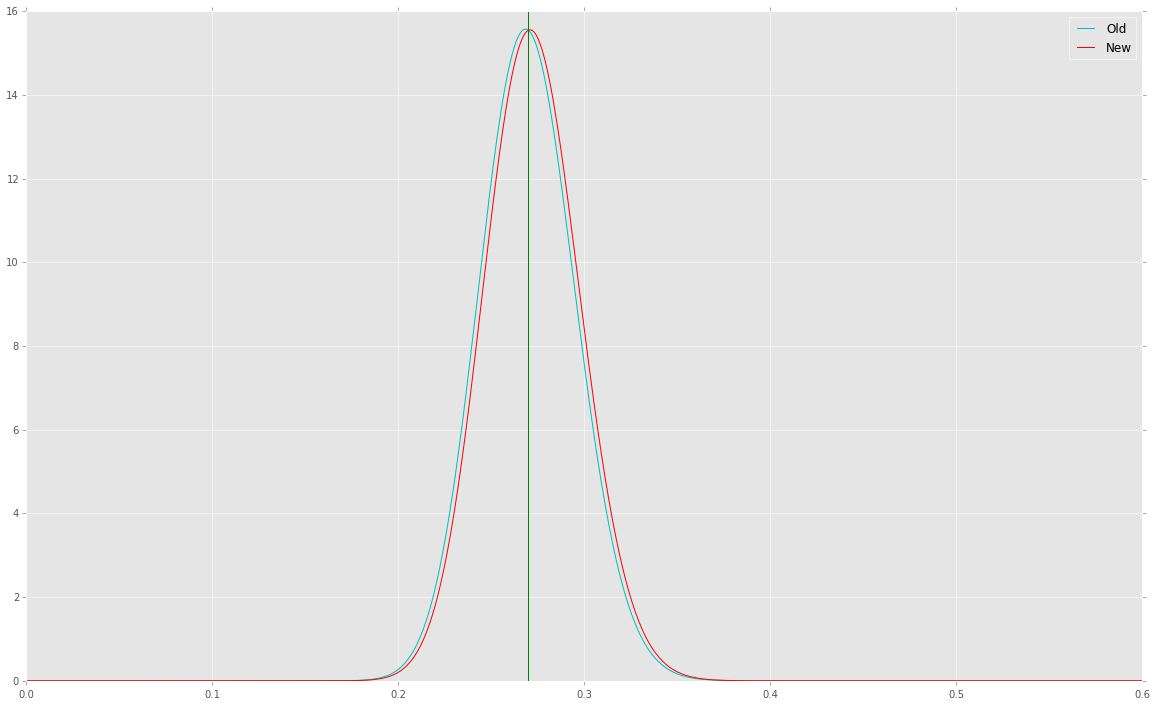

In [28]:
x = np.linspace(0,1,1000)

a = 81
b = 219
hank_pdf_old = beta.pdf(x, a, b, scale=1)

a = 82
b = 219
hank_pdf_new = beta.pdf(x, a, b, scale=1)

plt.plot(x, hank_pdf_old, color = 'c', label = 'Old')
plt.plot(x, hank_pdf_new, color = 'r', label = 'New')
plt.axvline(x=0.27, color = 'g')
plt.xlim(0,0.6)
plt.legend()
plt.show()

### Note how the new distribution is shifted to the right slightly

___

## 300 at bats into the season, Hank has gotten on base 100 times

- So now, $\alpha$ = 81+100 = 181 and $\beta$ = 219 + 200 = 419

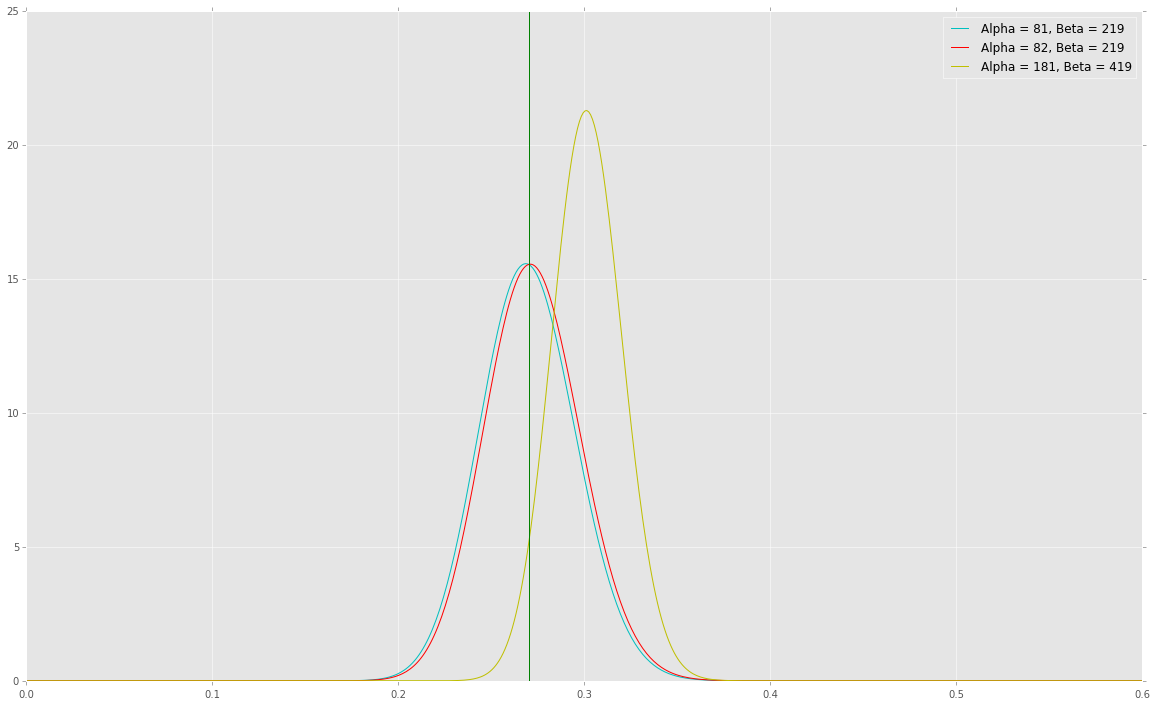

In [31]:
x = np.linspace(0,1,1000)

a = 81
b = 219
hank_pdf_old = beta.pdf(x, a, b, scale=1)

a = 82
b = 219
hank_pdf_new = beta.pdf(x, a, b, scale=1)

a = 181
b = 419
hank_pdf_new2 = beta.pdf(x, a, b, scale=1)

plt.plot(x, hank_pdf_old, color = 'c', label = 'Alpha = 81, Beta = 219')
plt.plot(x, hank_pdf_new, color = 'r', label = 'Alpha = 82, Beta = 219')
plt.plot(x, hank_pdf_new2, color = 'y', label = 'Alpha = 181, Beta = 419')
plt.axvline(x=0.27, color = 'g')
plt.xlim(0,0.6)
plt.legend()
plt.show()

## The Expected Value of the blue (i.e. original) distribution was $\frac{81}{300}=0.270$ while the yellow distribution has an Expected Value of $\frac{181}{600}=0.3017$

## Notice how this is less than the season's batting average of $\frac{100}{300}=0.333$ 

- In a way, you can think of the Beta Distribution as giving Hank a "head start" for the season by already giving him 81 hits on base for a total of 300 at bats